**The Project of Aygaz Machine Learning Bootcamp**


This project, We will  develop an end-to-end machine learning application using the also Kaggle dataset. Dataset contains following columns:

*   Age
*   Sex: Female, Male
*   BMI: Body MassIndex
*   Children: Number of Child
*   Smoker: Yes or No
*   Regions: Residential Area
*   Charges:  Individual medical costs billed by healty insurance

▶ We need some libraries for visualization, data analysis and an other libraries and we imported this libraries.

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


Now, Pandas **read_csv()** function imports a CSV file to DataFrame format.

In [251]:
insurance = pd.read_csv("insurance.csv")

▶ In the following line, real data copied the ins. We used because the original dataset don't be changing.

▶ We analysis this tablo. There are 7 columns and 1338 rows. The tablo contains customers age, gender, bmi, how many children they have, which region lives so the output is charges as well as bill for insurance of the healty.

In [252]:
ins = insurance.copy()
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


▶ Now we will see that table including is there null value or not.

In [253]:
ins.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


▶ The table has a lot of data and we can't see null values. So
 We will use **.sum()** function. This function gives to total of the null values

In [254]:
ins.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

▶The **info()** function gives us dype.

In [255]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We changed pandas series to dataframe.

In [256]:
ins[['charges']]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


▶Encode object types

In [257]:
print(ins['sex'].unique())
print(ins['smoker'].unique())
print(ins['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


▶ In the following line, **value_count()** functions is how many male and female in the dataset.

In [258]:
ins[['sex']].value_counts()

sex   
male      676
female    662
dtype: int64

▶ Looking at the column has count how many people smoke or not. The number of non-smokers is higher than smoker

In [259]:
ins[['smoker']].value_counts()

smoker
no        1064
yes        274
dtype: int64

In [260]:
ins['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

Why did we show sex intead of charges? Because, Charge datas aren't suitable for this plot type.

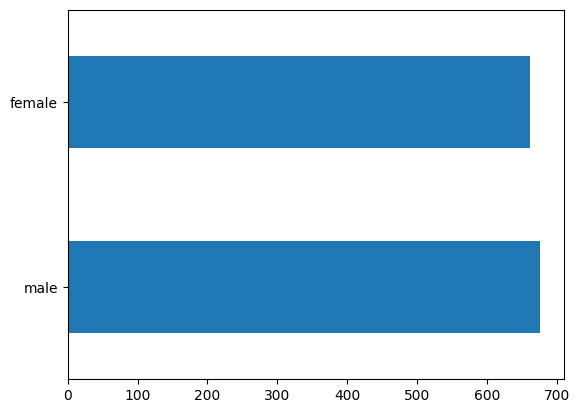

In [261]:
ins['sex'].value_counts().plot.barh();

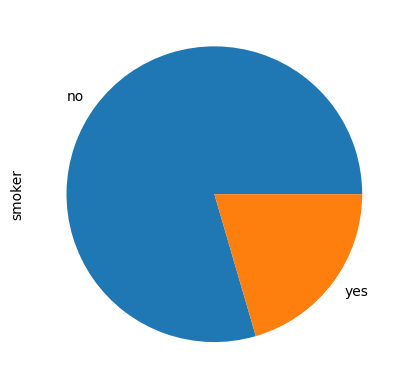

In [262]:
ins['smoker'].value_counts().plot.pie();


In [263]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


⭐  Looking at the column is the distribution of BMI. We will examine together. The above column gives the mean of the BMIs value is 30.66. Looking at the histograms x axes in 30. Thats mean are the same. So far the above table and the following histogram true.

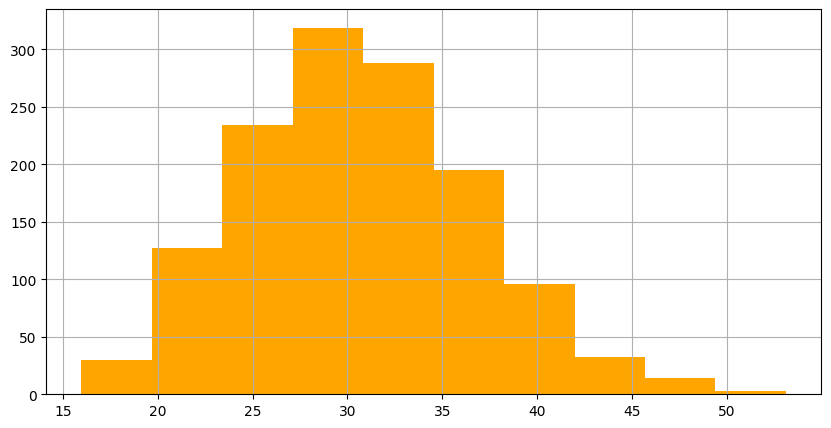

In [264]:
ins['bmi'].hist(figsize=(10,5), color="orange");

Now,The **astype()** method is dataframe where the data types has been changed to the specified type.

In [265]:
ins.charges = ins.charges.astype('int64')

The relationship between region and children.

In [266]:
ins.groupby("region")["children"].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

**South-East is the region the most children live in.**


This bar is explaning mean of relationship between age and bmi

age
18    31.326159
19    28.596912
20    30.632759
21    28.185714
22    31.087679
Name: bmi, dtype: float64


(27.0, 34.0)

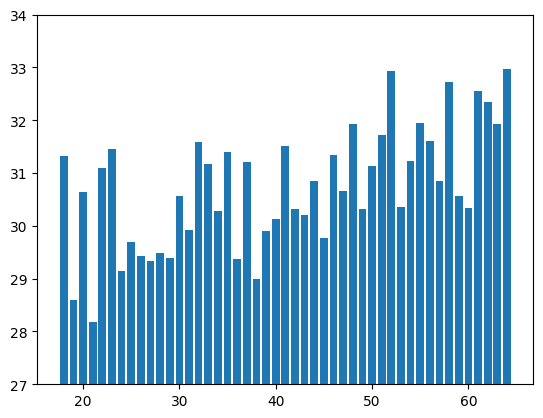

In [267]:
age_bmi = ins.groupby('age')['bmi'].mean()
print(age_bmi.head())
plt.bar(age_bmi.index, age_bmi.values)
plt.ylim(27, 34)

Correlation of age

In [268]:
ins.corr()['age']

<ipython-input-268-e0406b83bda8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ins.corr()['age']


age         1.000000
bmi         0.109272
children    0.042469
charges     0.299009
Name: age, dtype: float64

As seen above, there is no reasonable relationship between age and bmi.

In [269]:
ins.corr()['bmi']

<ipython-input-269-93e9ff29472e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ins.corr()['bmi']


age         0.109272
bmi         1.000000
children    0.012759
charges     0.198342
Name: bmi, dtype: float64

Since correlation is lower than .5, children and charges we cannot say there is an obvious relationship between them with bmi.

In [270]:
ins.corr()['charges']

<ipython-input-270-37eb2f0a3781>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ins.corr()['charges']


age         0.299009
bmi         0.198342
children    0.067999
charges     1.000000
Name: charges, dtype: float64

There is a strong correlation with charges and smokers. Therefore, we can use smokers as a prior indicator.

In [271]:
grouped_region_male = ins[ins['sex']==1].groupby('region')['bmi'].mean()
grouped_region_female = ins[ins['sex']==0].groupby('region')['bmi'].mean()

print(grouped_region_male)
print('-----------------')
print(grouped_region_female)

Series([], Name: bmi, dtype: float64)
-----------------
Series([], Name: bmi, dtype: float64)


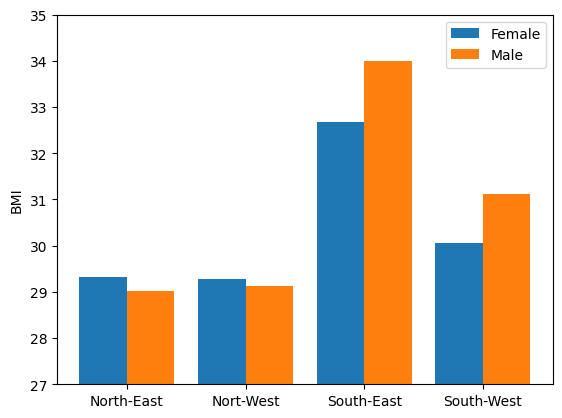

In [198]:
regions = ["North-East", "Nort-West", "South-East", "South-West"]
Male = [29.02, 29.12, 33.99, 31.12]
Female = [29.32, 29.27, 32.67, 30.06]

x_axis = np.arange(len(regions))

plt.bar(x_axis -0.2, Female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, Male, width=0.4, label = 'Male')

plt.xticks(x_axis, regions)
plt.ylabel("BMI")
plt.ylim(27, 35)
plt.legend()

plt.show()

In [272]:
ins_charges = ins.iloc[:,6:7]
ins_charges


,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [200]:

ins_charges_smoker = ins[(ins['smoker'] == 'yes')]
ins_charges_smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
11,62,female,26.290,0,yes,southeast,27808
14,27,male,42.130,0,yes,southeast,39611
19,30,male,35.300,0,yes,southwest,36837
23,34,female,31.920,1,yes,northeast,37701
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397
1314,30,female,23.655,3,yes,northwest,18765
1321,62,male,26.695,0,yes,northeast,28101
1323,42,female,40.370,2,yes,southeast,43896


In [201]:
ins_charges_non_smoker = ins[(ins["smoker"] =='no')]
ins_charges_non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866
5,31,female,25.740,0,no,southeast,3756
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411
1333,50,male,30.970,3,no,northwest,10600
1334,18,female,31.920,0,no,northeast,2205
1335,18,female,36.850,0,no,southeast,1629


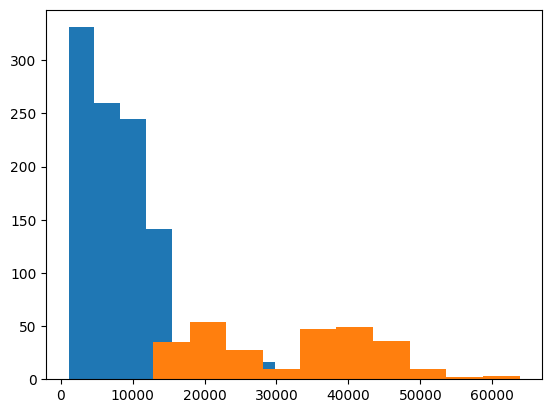

In [202]:
plt.hist(ins_charges_non_smoker["charges"]);
plt.hist(ins_charges_smoker["charges"]);

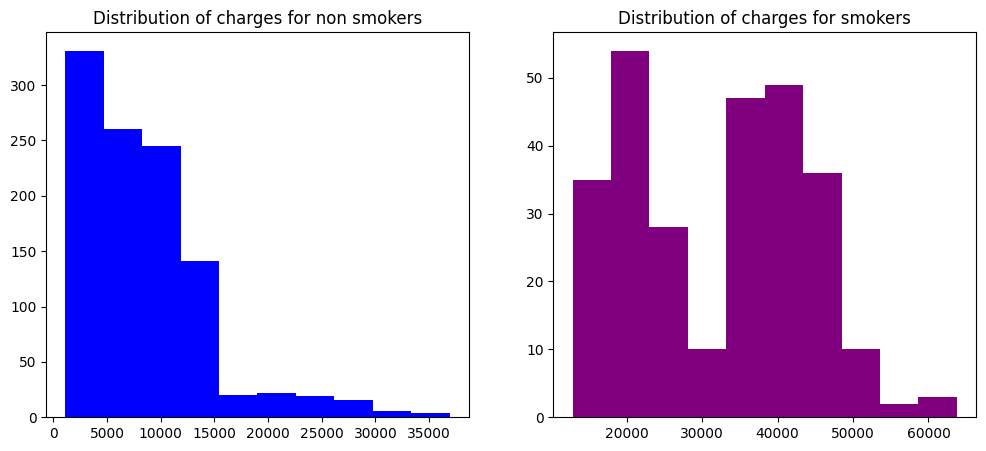

In [203]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plt.hist(ins_charges_non_smoker['charges'],color = 'b')
ax.set_title('Distribution of charges for non smokers')

ax=f.add_subplot(122)
plt.hist(ins_charges_smoker['charges'],color = 'purple')
ax.set_title('Distribution of charges for smokers');

In [204]:
ins_charges_non_smoker["charges"].describe()

count     1064.000000
mean      8433.778195
std       5993.777948
min       1121.000000
25%       3985.500000
50%       7345.000000
75%      11362.250000
max      36910.000000
Name: charges, dtype: float64

In [205]:
ins_charges_smoker["charges"].describe()

count      274.000000
mean     32049.726277
std      11541.588040
min      12829.000000
25%      20825.750000
50%      34455.500000
75%      41019.000000
max      63770.000000
Name: charges, dtype: float64

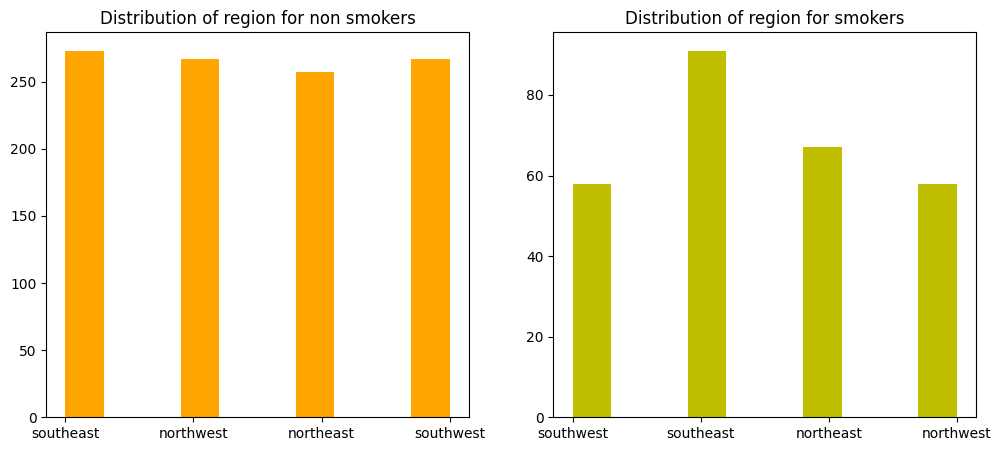

In [206]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plt.hist(ins_charges_non_smoker['region'],color = 'orange')
ax.set_title('Distribution of region for non smokers')

ax=f.add_subplot(122)
plt.hist(ins_charges_smoker['region'],color = 'y')
ax.set_title('Distribution of region for smokers');

In [207]:
ins_charges_non_smoker["region"].describe()

count          1064
unique            4
top       southeast
freq            273
Name: region, dtype: object

In [208]:
ins_charges_smoker["region"].describe()

count           274
unique            4
top       southeast
freq             91
Name: region, dtype: object

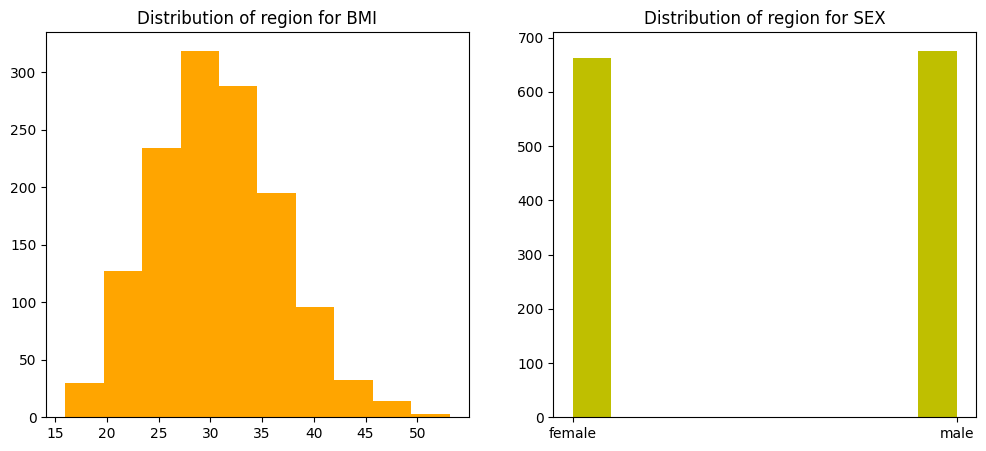

In [273]:
f= plt.figure(figsize=(12,5))
ax=f.add_subplot(121)
plt.hist(ins['bmi'],color = 'orange')
ax.set_title('Distribution of region for BMI')
ax=f.add_subplot(122)
plt.hist(ins['sex'],color = 'y')
ax.set_title('Distribution of region for SEX');

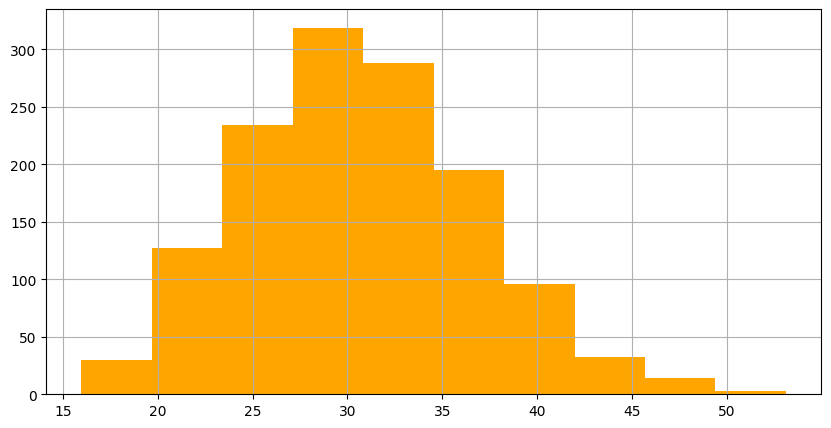

In [210]:
ins['bmi'].hist(figsize=(10,5), color="orange");

In [274]:
ins_charges = ins.iloc[:,6:7]
ins_charges

ins_charges_male = ins[(ins['sex'] == 'male')]
ins_charges_male

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866
8,37,male,29.830,2,no,northeast,6406
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239
1325,61,male,33.535,0,no,northeast,13143
1327,51,male,30.030,1,no,southeast,9377
1329,52,male,38.600,2,no,southwest,10325


In [216]:
ins_charges_female = ins[(ins["sex"] =='female')]
ins_charges_female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884
5,31,female,25.74,0,no,southeast,3756
6,46,female,33.44,1,no,southeast,8240
7,37,female,27.74,3,no,northwest,7281
9,60,female,25.84,0,no,northwest,28923
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411
1334,18,female,31.92,0,no,northeast,2205
1335,18,female,36.85,0,no,southeast,1629
1336,21,female,25.80,0,no,southwest,2007


Distribution of sex by bmi

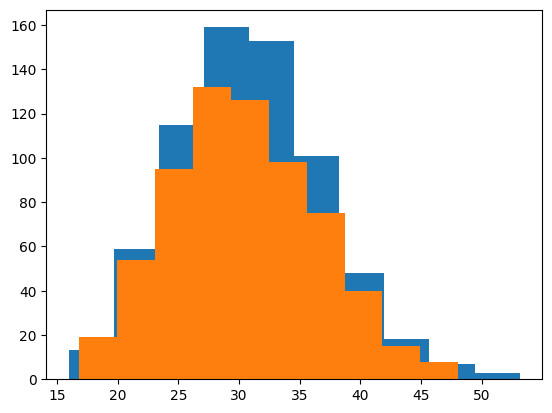

In [217]:
plt.hist(ins_charges_male['bmi'])
plt.hist(ins_charges_female['bmi']);

This column is I used seaborn function for grap of the boxplot. Why did I use this graph? Because I want to show outlier values. An outlier is extreme values in dataset. These values may be wrong writing. Looking at plots right side, eight or ten values are outlier value. The area part stays of outside.

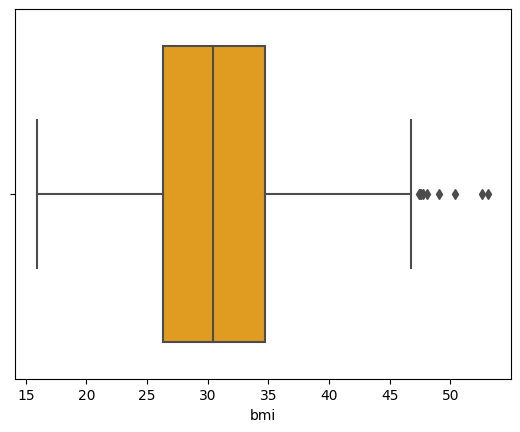

In [214]:
sns.boxplot(x="bmi",data=ins,color="orange");

In [275]:
ins['smoker']=ins['smoker'].map({'yes':int(1), 'no':int(0)})

ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884
1,18,male,33.770,1,0,southeast,1725
2,28,male,33.000,3,0,southeast,4449
3,33,male,22.705,0,0,northwest,21984
4,32,male,28.880,0,0,northwest,3866


In [276]:
ins['sex']=ins['sex'].map({'male':1, 'female':0})

ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884
1,18,1,33.770,1,0,southeast,1725
2,28,1,33.000,3,0,southeast,4449
3,33,1,22.705,0,0,northwest,21984
4,32,1,28.880,0,0,northwest,3866


In [ ]:
ins=pd.get_dummies(ins,columns=['region'])
ins.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884,0,0,0,1
1,18,1,33.770,1,0,1725,0,0,1,0
2,28,1,33.000,3,0,4449,0,0,1,0
3,33,1,22.705,0,0,21984,0,1,0,0
4,32,1,28.880,0,0,3866,0,1,0,0




▶ This section we try a train and test from dataset.


In [ ]:
y= ins[('charges')]
x=ins.drop(['charges'],axis=1)

In [ ]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


Value of the charges

In [219]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1338, dtype: int64

In [218]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866


▶Linear regression is commonly used for predictive analysis and modeling.


<hr/>

**Linear Regression**

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.3, random_state = 0)
LinReg2 = LinearRegression()
LinReg2.fit(x_train2, y_train2)

LinearRegression()

In [278]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)
features = ins.columns.to_list()
print('-------------------------')
[print(column_name, coefficient) for column_name, coefficient in zip(features, LinReg.coef_)]

0.7999870274939553
[ 2.53700164e+02 -1.54218219e+01  3.35964727e+02  4.36923782e+02
  2.36049912e+04  4.83863819e+02  2.23688992e+02 -4.29455253e+02
 -2.78097558e+02]
-12312.479227557664
-------------------------
age 253.70016358479302
sex -15.421821926824464
bmi 335.96472693176656
children 436.9237819183052
smoker 23604.991186520692
region 483.8638191361529
charges 223.68899221390083


[None, None, None, None, None, None, None]



*   MAE: mean_absolute_erro  
* MSE: mean_squared_error
*  RMSE: sqrt(mean_squared_error)




In [222]:
y_predict = LinReg.predict(x_test)
print(LinReg.score(x_test, y_test))
print('MAE: ',metrics.mean_absolute_error(y_test, y_predict))
print('MSE: ',metrics.mean_squared_error(y_test, y_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

0.7999870274939553
MAE:  3933.3168138222163
MSE:  31828183.58224312
RMSE:  5641.647240145658


<hr/>

**Random Forest Regression**

In [223]:
from sklearn.ensemble import RandomForestRegressor

Rfr = RandomForestRegressor(n_estimators=100, random_state=0)
Rfr.fit(x_train,y_train)
pred_Rfr =Rfr.predict(x_test)

In [224]:
print(Rfr.score(x_test, y_test))

print('MAE: ',metrics.mean_absolute_error(y_test, pred_Rfr))
print('MSE: ',metrics.mean_squared_error(y_test, pred_Rfr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, pred_Rfr)))

0.8767463970030495
MAE:  2654.6491305970153
MSE:  19613419.340794485
RMSE:  4428.704024971017


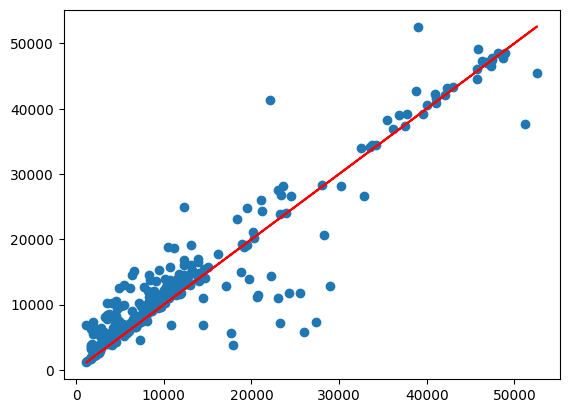

In [225]:
plt.scatter(y_test,pred_Rfr)

plt.plot(y_test,y_test,'r');

▶Until now Random Forest Regressor is the best one

<hr/>

**Gradient Boosting Regression**

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

Gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate=.2)
Gbr.fit(x_train, y_train)
y_predict = Gbr.predict(x_test)

print(Gbr.score(x_test, y_test))
print('MAE: ',metrics.mean_absolute_error(y_test, y_predict))
print('MSE: ',metrics.mean_squared_error(y_test, y_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

0.9000989493262392
MAE:  2384.9554610741584
MSE:  15897313.76452262
RMSE:  3987.143559557722


As seen in evaluation metrics **the best model is Gradient Boosting Regression**

<hr/>

In [241]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [242]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
cross_val_score(svr,x_train,y_train)

array([-0.08591767, -0.03593221, -0.08553937, -0.13654063, -0.16868303])

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def model_evalute(model):
    y_pred = model.predict(x_train)
    print('Mean absolute error:', mean_absolute_error(y_train,y_pred))
    print('Mean squared error:',mean_squared_error(y_train,y_pred))
    print('R squared score:',r2_score(y_train,y_pred))

In [244]:
model_evalute(svr)

Mean absolute error: 8248.822306278244
Mean squared error: 157357884.35364267
R squared score: -0.0975952526486028


Until now we developed a few regression models and highest score belongs to **Gradient Boosting Regression**. Therefore, we will try to maximize it thorugh changing its parameters.

In [245]:
def performances(max_depth, n_estimators, learning_rate):
  GBR = GradientBoostingRegressor(max_depth = max_depth, n_estimators = n_estimators , learning_rate = learning_rate)
  GBR.fit(x_train, y_train)
  y_predict = GBR.predict(x_test)

  score = GBR.score(x_test, y_test)
  print("Max depth: ", max_depth, "N estimators: ", n_estimators, "Learning rate: ", learning_rate, score)


depths = [2, 3, 4]
n_estimators = [50,100, 150,]
learning_rates = [.2, .3, .4, .5]

for depth in depths:
  for n_estimator in n_estimators:
    for learning_rate in learning_rates:
      performances(depth, n_estimator, learning_rate)

Max depth:  2 N estimators:  50 Learning rate:  0.2 0.9023802383618356
Max depth:  2 N estimators:  50 Learning rate:  0.3 0.8986903272307175
Max depth:  2 N estimators:  50 Learning rate:  0.4 0.8970298638948236
Max depth:  2 N estimators:  50 Learning rate:  0.5 0.8872671217370854
Max depth:  2 N estimators:  100 Learning rate:  0.2 0.9000989493262392
Max depth:  2 N estimators:  100 Learning rate:  0.3 0.8939140999861612
Max depth:  2 N estimators:  100 Learning rate:  0.4 0.8910927867640469
Max depth:  2 N estimators:  100 Learning rate:  0.5 0.8779508357841063
Max depth:  2 N estimators:  150 Learning rate:  0.2 0.893179931642452
Max depth:  2 N estimators:  150 Learning rate:  0.3 0.8859858110789429
Max depth:  2 N estimators:  150 Learning rate:  0.4 0.8882167034113083
Max depth:  2 N estimators:  150 Learning rate:  0.5 0.8748195981233715
Max depth:  3 N estimators:  50 Learning rate:  0.2 0.8971177141843473
Max depth:  3 N estimators:  50 Learning rate:  0.3 0.8919252492407722

The best result is N_Estimators is 50 new results with little changes are below

In [246]:
Gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 50, learning_rate=.2)
Gbr.fit(x_train, y_train)
y_predict = Gbr.predict(x_test)

print(Gbr.score(x_test, y_test))
print('MAE: ',metrics.mean_absolute_error(y_test, y_predict))
print('MSE: ',metrics.mean_squared_error(y_test, y_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

0.9023802383618356
MAE:  2403.8519775624227
MSE:  15534290.879959853
RMSE:  3941.356477148426
